In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Each image is a 28 * 28 greyscale image, each pixel having a value between 0 and 255. We will do the following changes to the images so that we can use them in a dense layer:-
1. Reshape the images from 28 X 28 to 784 X 1.
2. Normalize the values to range (0,1).

In [3]:
x_train = train_images.reshape((len(train_images), 28 * 28))
x_train = x_train.astype("float32") / 255

x_test = test_images.reshape((len(test_images), 28 * 28))
x_test = x_test.astype("float32") / 255

In [4]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

In [5]:
model = keras.Sequential([
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [6]:
class LossPlotsPerEpoch(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [7]:
callbacks_list = [
                  LossPlotsPerEpoch()
]

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3282 - accuracy: 0.9089
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1572 - accuracy: 0.9543
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1117 - accuracy: 0.9677
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0865 - accuracy: 0.9746
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9826
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0494 - accuracy: 0.9856
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9877
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9894
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0319 - accuracy: 0.9911

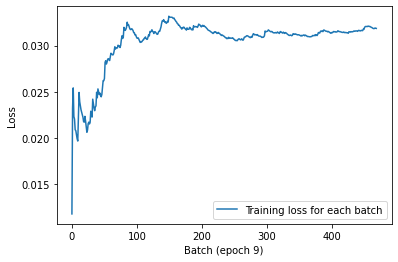

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=128, epochs=10,
                    callbacks=callbacks_list)

In [9]:
model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9767


[0.0816820040345192, 0.9767000079154968]